In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [257]:
class LogLike:
    def __init__(self):
        self.derivative=0
    #log likelihood for easy case, binary 1D
    def forward(self, est, truth):
        self.backward(est, truth)
        return -(truth*np.log((est+1e-7))+(1-truth)*np.log(1-(est-1e-7)))
    
    def backward(self, est, truth):
        #dl/dest
        self.derivative=-(truth/(est+1e-7) + (1-truth)/((est+1e-7)-1))
        return self.derivative
        
class Sigmoid:
    def __init__(self):
        self.derivative=None
        
    def forward(self, in_vec):
        self.backward(1/(1+np.exp(-in_vec)))
        return 1/(1+np.exp(-in_vec))
    
    def backward(self, forwar):
        self.derivative=forwar*(1-forwar)
        return self.derivative
        
        
class ReLU:
    def __init__(self):
        self.derivative=None
        
    def forward(self, in_vec):
        out_vec=in_vec.copy()
        out_vec[out_vec<0]=0
        self.backward(out_vec)
        return out_vec
    
    def backward(self, in_vec):
        vec_derivative=in_vec.copy()
        vec_derivative[vec_derivative!=0]=1
        self.derivative=np.diag(vec_derivative)
        return self.derivative
    

class LinLayer:
    #sans batch proc
    def __init__(self, input_size, output_size):
        self.weights=np.random.rand(output_size, input_size)*1/np.sqrt(output_size)-(1/np.sqrt(output_size)/2)
        self.bias=np.random.rand(output_size)*1/np.sqrt(output_size)-(1/np.sqrt(output_size)/2)
        self.derivative=np.zeros((output_size, input_size))
        
    def forward(self, in_vec):
        self.backward()
        return np.matmul(self.weights, in_vec)+self.bias
    
    def backward(self):
        #for i in range(self.derivate.shape[2]):
            #self.derivate[i,:,i]=self.weights[:,i]
        self.derivative=self.weights
        return self.derivative #dll/dinput
        
    def update(self, dlds, in_vec, eta=0.1):
        dldw=np.transpose(dlds)@in_vec[np.newaxis,:]
        dldb=dlds[0]
        self.weights=self.weights-eta*dldw
        self.bias=self.bias-eta*dldb
        return
    
    
    
def data_gen(N):
    points=np.random.rand(2,N)*2-1
    dist=np.sqrt(points[0,:]**2+points[1,:]**2)
    target=dist.copy()
    target[dist>0.7]=1
    target[dist<=0.7]=0
    target.astype(int)
    plt.scatter(points[0,:],points[1,:],c=target)
    return points,target

In [100]:
derivate=np.empty((output_size, output_size, input_size))
derivate.shape[2]

2

In [5]:
weights=np.random.rand(1, 2)*1/np.sqrt(1)-(1/np.sqrt(1)/2)
weights

array([[0.31222153, 0.44273401]])

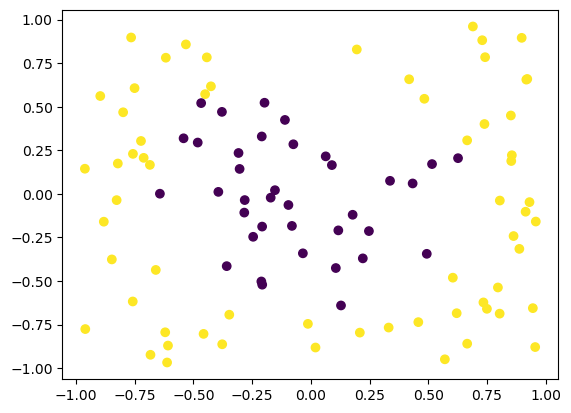

In [213]:
points,target=data_gen(100)


In [204]:
np.random.rand(2,1)*1/np.sqrt(2)-(1/np.sqrt(2)/2)

array([[-0.24486464],
       [ 0.22345401]])

In [175]:
np.exp(1)

2.718281828459045

In [57]:
logLik=LogLike()
reLU=ReLU()
linLayer=LinLayer(2,1)
sig=Sigmoid()

l_arr=[]

for epochs in range(100):
    for index in range(100):
        est=sig.forward(linLayer.forward(points[:,index]))
        l=logLik.forward(est,target[index])
        l_arr.append(l[0][0])
        dlds=sig.derivative*logLik.derivative
        linLayer.update(dlds, points[:,index],0.001)
    


IndexError: invalid index to scalar variable.

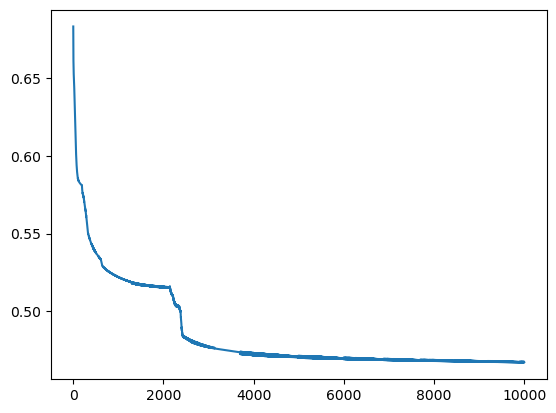

In [271]:
plt.plot(l_arr)

In [11]:
index=50
est=sig.forward(linLayer.forward(points[:,index]))
l=logLik.forward(est,target[index])
l_arr.append(l[0][0])
dlds=sig.derivative*logLik.derivative
linLayer.update(dlds, points[:,index],0.01)

In [34]:
index=50
print("point is " + str(points[:,index]))
print("target is " + str(target[index]))
est=sig.forward(linLayer.forward(points[:,index]))
print("estimate is " + str(est))

l=logLik.forward(est,target[index])
print("loss is " + str(l))
dlds=sig.derivative*logLik.derivative

print("weights are " + str(linLayer.weights))
eta=0.001
weights=linLayer.weights.copy()
dldw=dlds*points[:,index]
dldb=dlds
linLayer.update(dlds, points[:,index], eta)
weights=weights-eta*dldw
print("new weights are " + str(weights))
print("new weights are " + str(linLayer.weights))

newEst=sig.forward(linLayer.forward(points[:,index]))
print("new estimate is " + str(newEst))

#bias=bias-eta*dldb


point is [-0.3363013  -0.26484251]
target is 0.0
estimate is [[0.63414097]]
loss is [[1.00550691]]
weights are [[0.20242317 0.24752322]]
new weights are [[0.20263643 0.24769117]]
new weights are [[0.20263643 0.24769117]]
new estimate is [[0.63396687]]


In [270]:
logLik=LogLike()
reLU=ReLU()
linLayer1=LinLayer(2,4)
linLayer2=LinLayer(4,1)
sig=Sigmoid()

l_arr=[]
N=100

for e in range(10000):
    l_temp=0
    for i in range(N):
        
        h=reLU.forward(
            linLayer1.forward(
                points[:,i]
            )
        )
        #print(str(points[:,i]))
        
        #print(str(h))
        est=sig.forward(
            linLayer2.forward(
                h
            )
        )

        l=logLik.forward(est,target[i])
        l_temp=l_temp+l/N
        dldest=logLik.derivative
        destds2=sig.derivative
        dlds2=logLik.derivative*sig.derivative
        linLayer2.update(dlds2, h, 0.01)
        ds2dh=linLayer2.derivative
        dhds1=reLU.derivative
        dlds1=dlds2*ds2dh @ dhds1
        linLayer1.update(dlds1, points[:,i], 0.01)
        #print(i)
    l_arr.append(l_temp)

#est


In [254]:
linLayer1=LinLayer(2,4)
np.matmul(linLayer1.weights, points[:,0])+linLayer1.bias
linLayer1.bias

array([-0.03905863,  0.11385631,  0.02395517,  0.06872127])

In [251]:
linLayer1.update(dlds1, points[:,i], 0.001)

In [256]:
dlds1[0]

array([ 0.0680079 , -0.1220348 , -0.24621256,  0.18077326])

In [196]:
linLayer1.weights

array([[ 0.02048428, -0.11583787],
       [ 0.12063673,  0.10002561],
       [-0.17419355,  0.02153994],
       [ 0.04252583, -0.12295578]])

In [55]:
output_size=4
input_size=2
weights=np.random.rand(output_size, input_size)*1/np.sqrt(output_size)-(1/np.sqrt(output_size)/2)
weights
bias=np.random.rand(output_size)*1/np.sqrt(output_size)-(1/np.sqrt(output_size)/2)
        
np.matmul(weights, points[:,index])+bias

array([ 0.26327211,  0.14039467, -0.44949053,  0.17740253])

In [54]:
np.matmul(weights, points[:,index])

array([ 0.30570353, -0.286567  ,  0.05631961,  0.13469092])

In [165]:
index=0
est=reLU.forward(linLayer.forward(points[:,index]))
l=logLik.forward(est,target[index])
dldx=logLik.derivative
dlds=reLU.derivative*dldx #dl/dx*drelu/ds=dl/ds
dldw=dlds*points[:,index]
dldb=dlds
dldw

/tmp/ipykernel_2678/373228312.py:7: RuntimeWarning: invalid value encountered in log
  return truth*np.log(est)+(1-truth)*np.log(1-est)


array([[0.25487682, 0.3334458 ]])

In [178]:
index=0
est=sig.forward(linLayer.forward(points[:,index]))
l=logLik.forward(est,target[index])
dldx=logLik.derivative
dlds=sig.derivative*dldx #dl/dx*drelu/ds=dl/ds
dldw=dlds*points[:,index]
dldb=dlds
dldw

array([[0.05013704, 0.06559242]])

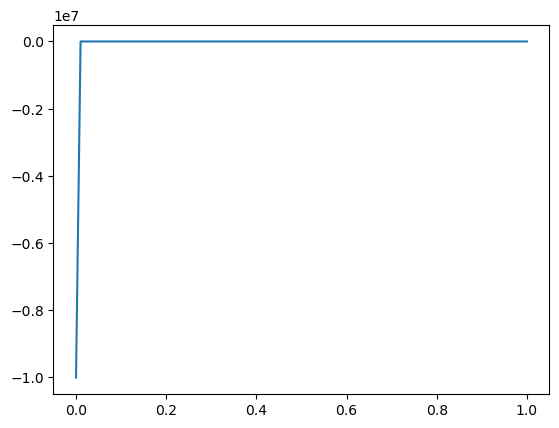

In [323]:

x=np.linspace(0,1,100)
y=np.empty(100)
y_d=np.empty(100)

count=0
for i in x:
    
    y[count]=logLik.forward(i,1)
    y_d[count]=logLik.backward(i,1)
    count=count+1
    
plt.plot(x[0:],y_d[0:])

In [317]:
y_d

array([-1.00000000e+07, -9.89990199e+01, -4.94997550e+01, -3.29998911e+01,
       -2.47499387e+01, -1.97999608e+01, -1.64999728e+01, -1.41428371e+01,
       -1.23749847e+01, -1.09999879e+01, -9.89999020e+00, -8.99999190e+00,
       -8.24999319e+00, -7.61537882e+00, -7.07142357e+00, -6.59999564e+00,
       -6.18749617e+00, -5.82352602e+00, -5.49999698e+00, -5.21052360e+00,
       -4.94999755e+00, -4.71428349e+00, -4.49999798e+00, -4.30434597e+00,
       -4.12499830e+00, -3.95999843e+00, -3.80769086e+00, -3.66666532e+00,
       -3.53571304e+00, -3.41379194e+00, -3.29999891e+00, -3.19354737e+00,
       -3.09374904e+00, -2.99999910e+00, -2.91176386e+00, -2.82857063e+00,
       -2.74999924e+00, -2.67567496e+00, -2.60526248e+00, -2.53846089e+00,
       -2.47499939e+00, -2.41463356e+00, -2.35714230e+00, -2.30232505e+00,
       -2.24999949e+00, -2.19999952e+00, -2.15217345e+00, -2.10638254e+00,
       -2.06249957e+00, -2.02040776e+00, -1.97999961e+00, -1.94117609e+00,
       -1.90384579e+00, -

In [149]:
points[:,index]

array([-0.71006167, -0.08550725])

In [122]:
#data_gen(100)>0.7
#points=np.random.rand(2,100)*2-1
dist=np.sqrt(points[0,:]**2+points[1,:]**2)
target=dist.copy()
target[dist>0.7]=1
target[dist<=0.7]=0
target.astype(int)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

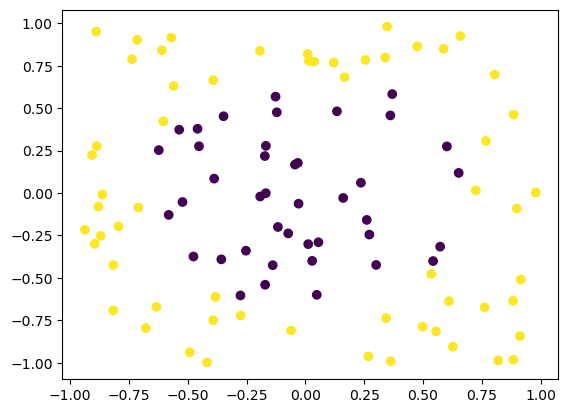

In [127]:
plt.scatter(points[0,:],points[1,:],c=target)

In [19]:
perc.forward(inpout)

array([[4.]])

In [21]:
np.max(inpout,1)

array([1, 2])

In [25]:
np.concatenate((inpout,inpout),1)

array([[1, 1],
       [2, 2]])

In [40]:
x=np.ones((2,2))

In [44]:
x[x==1]=3
x

array([[2., 2.],
       [2., 2.]])

In [55]:
np.diag(inpout[:,0])

array([[1, 0],
       [0, 2]])

In [86]:
inpout=np.array([[-1],[2],[3]])
np.size(inpout)

3

In [89]:
reLU=ReLU(3)
reLU.forward(inpout)
reLU.derivative

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [94]:
np.log(1)

0.0

In [ ]:
# input will be Dx1, D dim size